Data Cleaning
- Identify and count missing values in the dataset
- Identify and remove duplicates 
- Replace missing values in normalized losses, horsepower, price, etc with their respective means and convert them to appropriate data types. Provide before-and-after summaries.
- Detect and handle outliers in price using statistical methods 
- Convert categorical data (if any) into numerical format using appropriate encoding techniques.
Exploratory Data Analysis (EDA)
- Calculate summary statistics
- Create a correlation matrix and identify the strongest and weakest correlations
Visualizations
- histogram
- pairplot 
- Heat map
- violin plot
- countplot
- Bubble chart, etc

## STEPS
- Import 
- Structural Analysis
- Data cleaning
- EDA
- SEGMENTATION Analysis
- Feature Engineering

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
pd.set_option('display.max_columns',100)

In [2]:
df=pd.read_csv('C:\Datasets\Python\motorvehicles.csv',index_col=0)

In [98]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19    3.4               10.0        102     5500        24           30   
4  3.19    3.4                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          213 non-null    int64  
 1   normalized-losses  213 non-null    object 
 2   make               213 non-null    object 
 3   fuel-type          213 non-null    object 
 4   aspiration         213 non-null    object 
 5   num-of-doors       213 non-null    object 
 6   body-style         213 non-null    object 
 7   drive-wheels       213 non-null    object 
 8   engine-location    213 non-null    object 
 9   wheel-base         213 non-null    float64
 10  length             213 non-null    float64
 11  width              213 non-null    float64
 12  height             213 non-null    float64
 13  curb-weight        213 non-null    int64  
 14  engine-type        213 non-null    object 
 15  num-of-cylinders   213 non-null    object 
 16  engine-size        213 non

## Identify and count missing values in the dataset

In [100]:
df.isnull().count()

symboling            213
normalized-losses    213
make                 213
fuel-type            213
aspiration           213
num-of-doors         213
body-style           213
drive-wheels         213
engine-location      213
wheel-base           213
length               213
width                213
height               213
curb-weight          213
engine-type          213
num-of-cylinders     213
engine-size          213
fuel-system          213
bore                 213
stroke               213
compression-ratio    213
horsepower           213
peak-rpm             213
city-mpg             213
highway-mpg          213
price                213
dtype: int64

In [101]:
df.replace('?',np.nan,inplace=True)

In [102]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19    3.4               10.0        102     5500        24           30   
4  3.19    3.4                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [103]:
df.isnull().sum() #It as df.isnull()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Identify and remove duplicates

In [104]:
df[df.duplicated()]

symboling normalized-losses    make fuel-type aspiration num-of-doors  \
117          0               161  peugot       gas      turbo         four   
117          0               161  peugot       gas      turbo         four   
117          0               161  peugot       gas      turbo         four   
117          0               161  peugot       gas      turbo         four   
137          2               104    saab       gas      turbo         four   
137          2               104    saab       gas      turbo         four   
137          2               104    saab       gas      turbo         four   
137          2               104    saab       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
117      sedan          rwd           front       108.0   186.7   68.3   
117      sedan          rwd           front       108.0   186.7   68.3   
117      sedan          rwd           front       108.0   186.7   68.3   
117      sedan          rwd           front       108.0   186.7   68.3   
137      sedan          fwd           front        99.1   186.6   66.5   
137      sedan          fwd           front        99.1   186.6   66.5   
137      sedan          fwd           front        99.1   186.6   66.5   
137      sedan          fwd           front        99.1   186.6   66.5   

     height  curb-weight engine-type num-of-cylinders  engine-size  \
117    56.0         3130           l             four          134   
117    56.0         3130           l             four          134   
117    56.0         3130           l             four          134   
117    56.0         3130           l             four          134   
137    56.1         2847        dohc             four          121   
137    56.1         2847        dohc             four          121   
137    56.1         2847        dohc             four          121   
137    56.1         2847        dohc             four          121   

    fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  \
117        mpfi  3.61   3.21                7.0        142     5600        18   
117        mpfi  3.61   3.21                7.0        142     5600        18   
117        mpfi  3.61   3.21                7.0        142     5600        18   
117        mpfi  3.61   3.21                7.0        142     5600        18   
137        mpfi  3.54   3.07                9.0        160     5500        19   
137        mpfi  3.54   3.07                9.0        160     5500        19   
137        mpfi  3.54   3.07                9.0        160     5500        19   
137        mpfi  3.54   3.07                9.0        160     5500        19   

     highway-mpg  price  
117           24  18150  
117           24  18150  
117           24  18150  
117           24  18150  
137           26  18620  
137           26  18620  
137           26  18620  
137           26  18620

In [105]:
df=df.drop_duplicates()
df.shape

(205, 26)

In [106]:
df[115:140]


symboling normalized-losses      make fuel-type aspiration num-of-doors  \
115          0               161    peugot       gas        std         four   
116          0               161    peugot    diesel      turbo         four   
117          0               161    peugot       gas      turbo         four   
118          1               119  plymouth       gas        std          two   
119          1               119  plymouth       gas      turbo          two   
120          1               154  plymouth       gas        std         four   
121          1               154  plymouth       gas        std         four   
122          1               154  plymouth       gas        std         four   
123         -1                74  plymouth       gas        std         four   
124          3               NaN  plymouth       gas      turbo          two   
125          3               186   porsche       gas        std          two   
126          3               NaN   porsche       gas        std          two   
127          3               NaN   porsche       gas        std          two   
128          3               NaN   porsche       gas        std          two   
129          1               NaN   porsche       gas        std          two   
130          0               NaN   renault       gas        std         four   
131          2               NaN   renault       gas        std          two   
132          3               150      saab       gas        std          two   
133          2               104      saab       gas        std         four   
134          3               150      saab       gas        std          two   
135          2               104      saab       gas        std         four   
136          3               150      saab       gas      turbo          two   
137          2               104      saab       gas      turbo         four   
138          2                83    subaru       gas        std          two   
139          2                83    subaru       gas        std          two   

      body-style drive-wheels engine-location  wheel-base  length  width  \
115        sedan          rwd           front       107.9   186.7   68.4   
116        sedan          rwd           front       107.9   186.7   68.4   
117        sedan          rwd           front       108.0   186.7   68.3   
118    hatchback          fwd           front        93.7   157.3   63.8   
119    hatchback          fwd           front        93.7   157.3   63.8   
120    hatchback          fwd           front        93.7   157.3   63.8   
121        sedan          fwd           front        93.7   167.3   63.8   
122        sedan          fwd           front        93.7   167.3   63.8   
123        wagon          fwd           front       103.3   174.6   64.6   
124    hatchback          rwd           front        95.9   173.2   66.3   
125    hatchback          rwd           front        94.5   168.9   68.3   
126      hardtop          rwd            rear        89.5   168.9   65.0   
127      hardtop          rwd            rear        89.5   168.9   65.0   
128  convertible          rwd            rear        89.5   168.9   65.0   
129    hatchback          rwd           front        98.4   175.7   72.3   
130        wagon          fwd           front        96.1   181.5   66.5   
131    hatchback          fwd           front        96.1   176.8   66.6   
132    hatchback          fwd           front        99.1   186.6   66.5   
133        sedan          fwd           front        99.1   186.6   66.5   
134    hatchback          fwd           front        99.1   186.6   66.5   
135        sedan          fwd           front        99.1   186.6   66.5   
136    hatchback          fwd           front        99.1   186.6   66.5   
137        sedan          fwd           front        99.1   186.6   66.5   
138    hatchback          fwd           front        93.7   156.9   63.4   
139    hatchback        

## Replace missing values in normalized losses, horsepower, price, etc with their respective means and convert them to appropriate data types. 


In [107]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [4]:
cols= ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
df[cols]= df[cols].apply(pd.to_numeric, errors='coerce')

#df['normalized-losses']=pd.to_numeric(df['normalized-losses'],errors='coerce')

In [5]:
df[cols].dtypes

normalized-losses    float64
bore                 float64
stroke               float64
horsepower           float64
peak-rpm             float64
price                float64
dtype: object

In [6]:
df.describe(include='all')

symboling  normalized-losses    make fuel-type aspiration  \
count   213.000000         172.000000     213       213        213   
unique         NaN                NaN      22         2          2   
top            NaN                NaN  toyota       gas        std   
freq           NaN                NaN      32       193        168   
mean      0.840376         122.488372     NaN       NaN        NaN   
std       1.237337          35.217866     NaN       NaN        NaN   
min      -2.000000          65.000000     NaN       NaN        NaN   
25%       0.000000          94.000000     NaN       NaN        NaN   
50%       1.000000         115.000000     NaN       NaN        NaN   
75%       2.000000         150.000000     NaN       NaN        NaN   
max       3.000000         256.000000     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  \
count           213        213          213             213  213.000000   
unique            3          5            3               2         NaN   
top            four      sedan          fwd           front         NaN   
freq            122        104          124             210         NaN   
mean            NaN        NaN          NaN             NaN   98.936620   
std             NaN        NaN          NaN             NaN    6.039467   
min             NaN        NaN          NaN             NaN   86.600000   
25%             NaN        NaN          NaN             NaN   94.500000   
50%             NaN        NaN          NaN             NaN   97.200000   
75%             NaN        NaN          NaN             NaN  102.400000   
max             NaN        NaN          NaN             NaN  120.900000   

            length       width      height  curb-weight engine-type  \
count   213.000000  213.000000  213.000000   213.000000         213   
unique         NaN         NaN         NaN          NaN           7   
top            NaN         NaN         NaN          NaN         ohc   
freq           NaN         NaN         NaN          NaN         148   
mean    174.522535   65.963850   53.812207  2571.826291         NaN   
std      12.338219    2.130652    2.437607   518.112151         NaN   
min     141.100000   60.300000   47.800000  1488.000000         NaN   
25%     166.800000   64.200000   52.000000  2190.000000         NaN   
50%     173.400000   65.500000   54.100000  2455.000000         NaN   
75%     186.600000   66.900000   55.700000  2954.000000         NaN   
max     208.100000   72.300000   59.800000  4066.000000         NaN   

       num-of-cylinders  engine-size fuel-system        bore      stroke  \
count               213   213.000000         213  209.000000  209.000000   
unique                7          NaN           8         NaN         NaN   
top                four          NaN        mpfi         NaN         NaN   
freq                167          NaN         102         NaN         NaN   
mean                NaN   126.929577         NaN    3.339139    3.251005   
std                 NaN    40.869093         NaN    0.272429    0.311662   
min                 NaN    61.000000         NaN    2.540000    2.070000   
25%                 NaN    98.000000         NaN    3.150000    3.110000   
50%                 NaN   120.000000         NaN    3.330000    3.270000   
75%                 NaN   141.000000         NaN    3.590000    3.410000   
max                 NaN   326.000000         NaN    3.940000    4.170000   

        compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count          213.000000  211.000000   211.000000  213.000000   213.000000   
unique                NaN         NaN          NaN         NaN          NaN   
top                   NaN         NaN          NaN         NaN          NaN   
freq                  NaN         NaN          NaN         NaN          NaN   
mean            10.062066  106.028436  5141.469194   24.967136    30.535211   
std              3.922524  

In [110]:
df[cols] = df[cols].fillna(df[cols].mean()) # does not work correctly if data types differ

#df[['normalized-losses', 'horsepower', 'peak', 'price']] = df[['normalized-losses', 'horsepower', 'peak', 'price']].apply(lambda x: x.fillna(x.mean()))
# lambda x: x.fillna(x.mean())
# x represents each column in the selected DataFrame.
# x.mean() calculates the mean of that column.
# x.fillna(x.mean()) replaces all NaN values in that column with its mean.

In [111]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0          two  convertible          rwd           front        88.6   168.8   
1          two  convertible          rwd           front        88.6   168.8   
2          two    hatchback          rwd           front        94.5   171.2   
3         four        sedan          fwd           front        99.8   176.6   
4         four        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc             four          130   
1   64.1    48.8         2548        dohc             four          130   
2   65.5    52.4         2823        ohcv              six          152   
3   66.2    54.3         2337         ohc             four          109   
4   66.4    54.3         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        mpfi  3.47    2.68                9.0       111.0    5000.0   
1        mpfi  3.47    2.68                9.0       111.0    5000.0   
2        mpfi  2.68    3.47                9.0       154.0    5000.0   
3        mpfi  3.19    3.40               10.0       102.0    5500.0   
4        mpfi  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  
0        21           27  13495.0  
1        21           27  16500.0  
2        19           26  16500.0  
3        24           30  13950.0  
4        18           22  17450.0

In [112]:
df[df['num-of-doors'].isna()]

symboling  normalized-losses   make fuel-type aspiration num-of-doors  \
27          1              148.0  dodge       gas      turbo          NaN   
63          0              122.0  mazda    diesel        std          NaN   

   body-style drive-wheels engine-location  wheel-base  length  width  height  \
27      sedan          fwd           front        93.7   157.3   63.8    50.6   
63      sedan          fwd           front        98.8   177.8   66.5    55.5   

    curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
27         2191         ohc             four           98        mpfi  3.03   
63         2443         ohc             four          122         idi  3.39   

    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
27    3.39                7.6       102.0    5500.0        24           30   
63    3.39               22.7        64.0    4650.0        36           42   

      price  
27   8558.0  
63  10795.0

In [113]:
grouped = df.groupby(['make','drive-wheels','body-style','engine-location','length'],observed=True)['num-of-doors'].value_counts().reset_index(name='count')
my_condition = (grouped['make'].isin(['dodge','mazda'])) & (grouped['count']!=0) & (grouped['body-style']=='sedan')
grouped[(my_condition)]


make drive-wheels body-style engine-location  length num-of-doors  count
19  dodge          fwd      sedan           front   157.3         four      2
37  mazda          fwd      sedan           front   166.8         four      2
38  mazda          fwd      sedan           front   177.8         four      2
40  mazda          rwd      sedan           front   175.0         four      2

In [114]:
df['num-of-doors'] = df['num-of-doors'].fillna('four')
#df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0]) - 0 is to instruct to pick value at 0 index

df['num-of-doors'].isna().sum()

0

## Provide before-and-after summaries.

## Before

In [115]:
df1=pd.read_csv('C:\Datasets\Python\motorvehicles.csv',index_col=[0])

In [116]:
df1.describe(include='all')

symboling normalized-losses    make fuel-type aspiration  \
count   213.000000               213     213       213        213   
unique         NaN                52      22         2          2   
top            NaN                 ?  toyota       gas        std   
freq           NaN                41      32       193        168   
mean      0.840376               NaN     NaN       NaN        NaN   
std       1.237337               NaN     NaN       NaN        NaN   
min      -2.000000               NaN     NaN       NaN        NaN   
25%       0.000000               NaN     NaN       NaN        NaN   
50%       1.000000               NaN     NaN       NaN        NaN   
75%       2.000000               NaN     NaN       NaN        NaN   
max       3.000000               NaN     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  \
count           213        213          213             213  213.000000   
unique            3          5            3               2         NaN   
top            four      sedan          fwd           front         NaN   
freq            122        104          124             210         NaN   
mean            NaN        NaN          NaN             NaN   98.936620   
std             NaN        NaN          NaN             NaN    6.039467   
min             NaN        NaN          NaN             NaN   86.600000   
25%             NaN        NaN          NaN             NaN   94.500000   
50%             NaN        NaN          NaN             NaN   97.200000   
75%             NaN        NaN          NaN             NaN  102.400000   
max             NaN        NaN          NaN             NaN  120.900000   

            length       width      height  curb-weight engine-type  \
count   213.000000  213.000000  213.000000   213.000000         213   
unique         NaN         NaN         NaN          NaN           7   
top            NaN         NaN         NaN          NaN         ohc   
freq           NaN         NaN         NaN          NaN         148   
mean    174.522535   65.963850   53.812207  2571.826291         NaN   
std      12.338219    2.130652    2.437607   518.112151         NaN   
min     141.100000   60.300000   47.800000  1488.000000         NaN   
25%     166.800000   64.200000   52.000000  2190.000000         NaN   
50%     173.400000   65.500000   54.100000  2455.000000         NaN   
75%     186.600000   66.900000   55.700000  2954.000000         NaN   
max     208.100000   72.300000   59.800000  4066.000000         NaN   

       num-of-cylinders  engine-size fuel-system  bore stroke  \
count               213   213.000000         213   213    213   
unique                7          NaN           8    39     37   
top                four          NaN        mpfi  3.62    3.4   
freq                167          NaN         102    23     20   
mean                NaN   126.929577         NaN   NaN    NaN   
std                 NaN    40.869093         NaN   NaN    NaN   
min                 NaN    61.000000         NaN   NaN    NaN   
25%                 NaN    98.000000         NaN   NaN    NaN   
50%                 NaN   120.000000         NaN   NaN    NaN   
75%                 NaN   141.000000         NaN   NaN    NaN   
max                 NaN   326.000000         NaN   NaN    NaN   

        compression-ratio horsepower peak-rpm    city-mpg  highway-mpg  price  
count          213.000000        213      213  213.000000   213.000000    213  
unique                NaN         60       24         NaN          NaN    187  
top                   NaN         68     5500         NaN          NaN  18150  
freq                  NaN         19       41         NaN          NaN      6  
mean            10.062066        NaN      NaN   24.967136    30.535211    NaN  
std              3.922524        NaN      NaN    6.544755     6.846355    NaN  
min              7.000000        NaN      NaN   13.000000    16.000000    NaN  
25%  

## After

In [117]:
df.describe(include='all')

symboling  normalized-losses    make fuel-type aspiration  \
count   205.000000         205.000000     205       205        205   
unique         NaN                NaN      22         2          2   
top            NaN                NaN  toyota       gas        std   
freq           NaN                NaN      32       185        168   
mean      0.834146         122.000000     NaN       NaN        NaN   
std       1.245307          31.681008     NaN       NaN        NaN   
min      -2.000000          65.000000     NaN       NaN        NaN   
25%       0.000000         101.000000     NaN       NaN        NaN   
50%       1.000000         122.000000     NaN       NaN        NaN   
75%       2.000000         137.000000     NaN       NaN        NaN   
max       3.000000         256.000000     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  \
count           205        205          205             205  205.000000   
unique            2          5            3               2         NaN   
top            four      sedan          fwd           front         NaN   
freq            116         96          120             202         NaN   
mean            NaN        NaN          NaN             NaN   98.756585   
std             NaN        NaN          NaN             NaN    6.021776   
min             NaN        NaN          NaN             NaN   86.600000   
25%             NaN        NaN          NaN             NaN   94.500000   
50%             NaN        NaN          NaN             NaN   97.000000   
75%             NaN        NaN          NaN             NaN  102.400000   
max             NaN        NaN          NaN             NaN  120.900000   

            length       width      height  curb-weight engine-type  \
count   205.000000  205.000000  205.000000   205.000000         205   
unique         NaN         NaN         NaN          NaN           7   
top            NaN         NaN         NaN          NaN         ohc   
freq           NaN         NaN         NaN          NaN         148   
mean    174.049268   65.907805   53.724878  2555.565854         NaN   
std      12.337289    2.145204    2.443522   520.680204         NaN   
min     141.100000   60.300000   47.800000  1488.000000         NaN   
25%     166.300000   64.100000   52.000000  2145.000000         NaN   
50%     173.200000   65.500000   54.100000  2414.000000         NaN   
75%     183.100000   66.900000   55.500000  2935.000000         NaN   
max     208.100000   72.300000   59.800000  4066.000000         NaN   

       num-of-cylinders  engine-size fuel-system        bore      stroke  \
count               205   205.000000         205  205.000000  205.000000   
unique                7          NaN           8         NaN         NaN   
top                four          NaN        mpfi         NaN         NaN   
freq                159          NaN          94         NaN         NaN   
mean                NaN   126.907317         NaN    3.329751    3.255423   
std                 NaN    41.642693         NaN    0.270844    0.313597   
min                 NaN    61.000000         NaN    2.540000    2.070000   
25%                 NaN    97.000000         NaN    3.150000    3.110000   
50%                 NaN   120.000000         NaN    3.310000    3.290000   
75%                 NaN   141.000000         NaN    3.580000    3.410000   
max                 NaN   326.000000         NaN    3.940000    4.170000   

        compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count          205.000000  205.000000   205.000000  205.000000   205.000000   
unique                NaN         NaN          NaN         NaN          NaN   
top                   NaN         NaN          NaN         NaN          NaN   
freq                  NaN         NaN          NaN         NaN          NaN   
mean            10.142537  104.256158  5125.369458   25.219512    30.751220   
std              3.972040  

## Detect and handle outliers in price using statistical methods

<AxesSubplot:ylabel='price'>

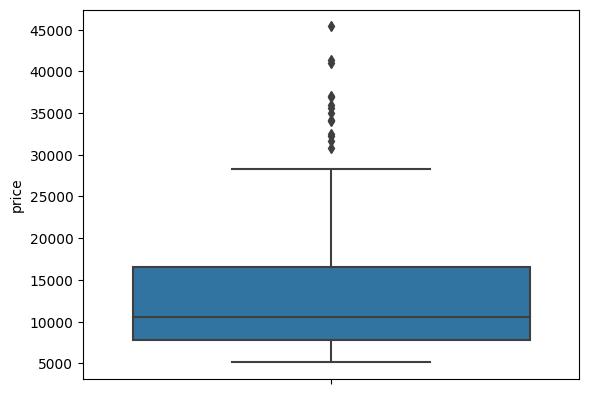

In [118]:
sns.boxplot(data=df,y='price')

In [119]:
# Using Z score 
mean = df['price'].mean()
std = df['price'].std()

z_score = (df['price'] - mean) / std  # Compute Z-score
outliers = df[np.abs(z_score) > 3] # Select rows where Z-score > 3 either direction since we use np.abs
# np.abs() takes the absolute value of 'z-score'
outliers


symboling  normalized-losses           make fuel-type aspiration  \
16           0              122.0            bmw       gas        std   
17           0              122.0            bmw       gas        std   
73           0              122.0  mercedes-benz       gas        std   
74           1              122.0  mercedes-benz       gas        std   
128          3              122.0        porsche       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
16           two        sedan          rwd           front       103.5   
17          four        sedan          rwd           front       110.0   
73          four        sedan          rwd           front       120.9   
74           two      hardtop          rwd           front       112.0   
128          two  convertible          rwd            rear        89.5   

     length  width  height  curb-weight engine-type num-of-cylinders  \
16    193.8   67.9    53.7         3380         ohc              six   
17    197.0   70.9    56.3         3505         ohc              six   
73    208.1   71.7    56.7         3900        ohcv            eight   
74    199.2   72.0    55.4         3715        ohcv            eight   
128   168.9   65.0    51.6         2800        ohcf              six   

     engine-size fuel-system  bore  stroke  compression-ratio  horsepower  \
16           209        mpfi  3.62    3.39                8.0       182.0   
17           209        mpfi  3.62    3.39                8.0       182.0   
73           308        mpfi  3.80    3.35                8.0       184.0   
74           304        mpfi  3.80    3.35                8.0       184.0   
128          194        mpfi  3.74    2.90                9.5       207.0   

     peak-rpm  city-mpg  highway-mpg    price  
16     5400.0        16           22  41315.0  
17     5400.0        15           20  36880.0  
73     4500.0        14           16  40960.0  
74     4500.0        14           16  45400.0  
128    5900.0        17           25  37028.0

In [120]:
# Using Inter Quantile Range(IQR)
# Any data point below (Q1 - 1.5)lower bound or above (Q3 + 1.5)upper bound is considered an outlier

Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

outliers

symboling  normalized-losses           make fuel-type aspiration  \
15           0              122.0            bmw       gas        std   
16           0              122.0            bmw       gas        std   
17           0              122.0            bmw       gas        std   
47           0              145.0         jaguar       gas        std   
48           0              122.0         jaguar       gas        std   
49           0              122.0         jaguar       gas        std   
70          -1               93.0  mercedes-benz    diesel      turbo   
71          -1              122.0  mercedes-benz       gas        std   
72           3              142.0  mercedes-benz       gas        std   
73           0              122.0  mercedes-benz       gas        std   
74           1              122.0  mercedes-benz       gas        std   
126          3              122.0        porsche       gas        std   
127          3              122.0        porsche       gas        std   
128          3              122.0        porsche       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
15          four        sedan          rwd           front       103.5   
16           two        sedan          rwd           front       103.5   
17          four        sedan          rwd           front       110.0   
47          four        sedan          rwd           front       113.0   
48          four        sedan          rwd           front       113.0   
49           two        sedan          rwd           front       102.0   
70          four        sedan          rwd           front       115.6   
71          four        sedan          rwd           front       115.6   
72           two  convertible          rwd           front        96.6   
73          four        sedan          rwd           front       120.9   
74           two      hardtop          rwd           front       112.0   
126          two      hardtop          rwd            rear        89.5   
127          two      hardtop          rwd            rear        89.5   
128          two  convertible          rwd            rear        89.5   

     length  width  height  curb-weight engine-type num-of-cylinders  \
15    189.0   66.9    55.7         3230         ohc              six   
16    193.8   67.9    53.7         3380         ohc              six   
17    197.0   70.9    56.3         3505         ohc              six   
47    199.6   69.6    52.8         4066        dohc              six   
48    199.6   69.6    52.8         4066        dohc              six   
49    191.7   70.6    47.8         3950        ohcv           twelve   
70    202.6   71.7    56.3         3770         ohc             five   
71    202.6   71.7    56.5         3740        ohcv            eight   
72    180.3   70.5    50.8         3685        ohcv            eight   
73    208.1   71.7    56.7         3900        ohcv            eight   
74    199.2   72.0    55.4         3715        ohcv            eight   
126   168.9   65.0    51.6         2756        ohcf              six   
127   168.9   65.0    51.6         2756        ohcf              six   
128   168.9   65.0    51.6         2800        ohcf              six   

     engine-size fuel-system  bore  stroke  compression-ratio  horsepower  \
15           209        mpfi  3.62    3.39                8.0       182.0   
16           209        mpfi  3.62    3.39                8.0       182.0   
17           209        mpfi  3.62    3.39                8.0       182.0   
47           258        mpfi  3.63    4.17                8.1       176.0   
48           258        mpfi  3.63    4.17                8.1       176.0   
49           326        mpfi  3.54    2.76               11.5       262.0   
70           183         idi  3.58    3.64               21.5       123.0   
71           234        mpfi  3.46    3.10                8.3       155.0   
72           234        

In [124]:
#Log Transform
# Best for right skewed data. It compresses large values
df['log_price'] = np.log1p(df['price'])


In [125]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0          two  convertible          rwd           front        88.6   168.8   
1          two  convertible          rwd           front        88.6   168.8   
2          two    hatchback          rwd           front        94.5   171.2   
3         four        sedan          fwd           front        99.8   176.6   
4         four        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc             four          130   
1   64.1    48.8         2548        dohc             four          130   
2   65.5    52.4         2823        ohcv              six          152   
3   66.2    54.3         2337         ohc             four          109   
4   66.4    54.3         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        mpfi  3.47    2.68                9.0       111.0    5000.0   
1        mpfi  3.47    2.68                9.0       111.0    5000.0   
2        mpfi  2.68    3.47                9.0       154.0    5000.0   
3        mpfi  3.19    3.40               10.0       102.0    5500.0   
4        mpfi  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  log_price  
0        21           27  13495.0   9.510149  
1        21           27  16500.0   9.711176  
2        19           26  16500.0   9.711176  
3        24           30  13950.0   9.543306  
4        18           22  17450.0   9.767152

<AxesSubplot:ylabel='log_price'>

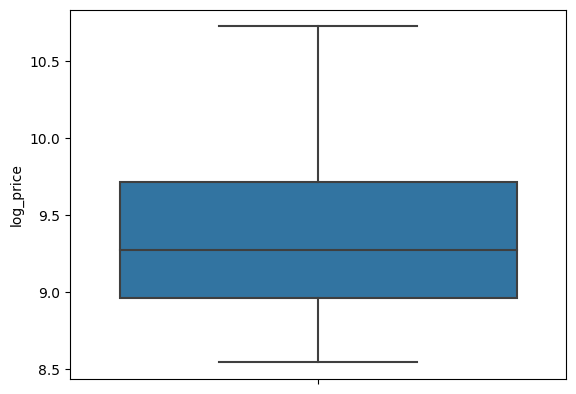

In [126]:
sns.boxplot(data=df,y='log_price')

In [130]:
# To convert logprice back to actual price
#np.exp(log_price_value).round(2)

 ### OR

In [167]:
# Apply Power Transformation (Yeo-Johnson works with negative & zero values)
# Best for general cases. Normalizes distribution
pt = PowerTransformer(method='yeo-johnson')
df['price_power'] = pt.fit_transform(df[['price']])


<AxesSubplot:ylabel='price_power'>

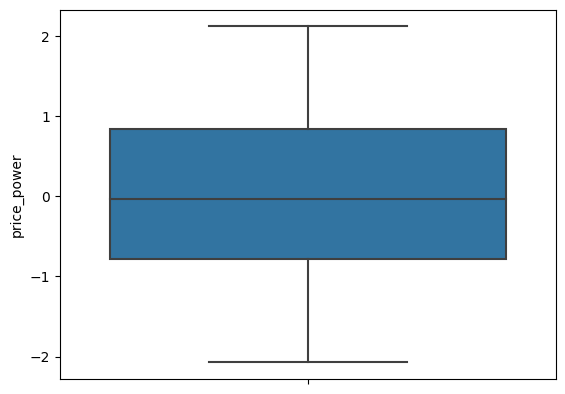

In [168]:
sns.boxplot(data=df,y='price_power')

In [173]:
# Inverse Transformation to Get Original Values
df['price_original'] = pt.inverse_transform(df[['price_power']])


C:\Users\Gracious Sophie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price_power
Feature names seen at fit time, yet now missing:
- price

  warnings.warn(message, FutureWarning)


In [175]:
# Quantile transform
# Works with any dataset.Maps data smoothly to a normal scale
qt = QuantileTransformer(output_distribution='normal')
df['price_quantile'] = qt.fit_transform(df[['price']])

# Outliers Keep Their Rank, But Their Magnitude Changes
# transformation new values based on the percentile ranking of the original data.
# Outliers move closer to the bulk of the data but remain the lowest or highest points.


C:\Users\Gracious Sophie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (205). n_quantiles is set to n_samples.
  warnings.warn(


<AxesSubplot:ylabel='price_quantile'>

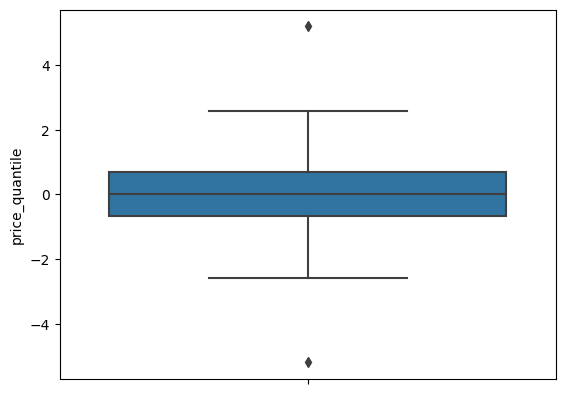

In [176]:
sns.boxplot(data=df,y='price_quantile')

### OR

In [134]:
#df=df.drop(outliers.index)

In [ ]:
# Original value using RobustScaler
# Original Value=(Scaled Value×IQR)+Median

# Q1 = df['price'].quantile(0.25)  # 25th percentile
# Q3 = df['price'].quantile(0.75)  # 75th percentile
# IQR = Q3 - Q1  # Interquartile Range

# Original_Value=(0.630665 * IQR)+ df['price'].median()
# #Original_Value=(0.298474 * 8712)+10595
# Original_Value.round(2)

- ## Convert categorical data (if any) into numerical format using appropriate encoding techniques.

In [136]:
# categorical_cols = df.select_dtypes(include=['object']).columns
# print("Categorical columns:", categorical_cols)


In [137]:
df.select_dtypes(include=['object']).describe()

make fuel-type aspiration num-of-doors body-style drive-wheels  \
count      205       205        205          205        205          205   
unique      22         2          2            2          5            3   
top     toyota       gas        std         four      sedan          fwd   
freq        32       185        168          116         96          120   

       engine-location engine-type num-of-cylinders fuel-system  
count              205         205              205         205  
unique               2           7                7           8  
top              front         ohc             four        mpfi  
freq               202         148              159          94

In [138]:
categorical_cols=['fuel-type','aspiration','num-of-doors','drive-wheels','engine-location','engine-type']
df[categorical_cols]=df[categorical_cols].astype('category')

In [139]:
df[categorical_cols].dtypes

fuel-type          category
aspiration         category
num-of-doors       category
drive-wheels       category
engine-location    category
engine-type        category
dtype: object

In [140]:
mapping = {'two': 2, 'four': 4}
df['num-of-doors'] = df['num-of-doors'].map(mapping)


In [141]:
mapping = {'two': 2, 'three':3, 'four': 4, 'five': 5,'six':6,'eight':8}
df['num-of-cylinders'] = df['num-of-cylinders'].map(mapping)

In [142]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0            2  convertible          rwd           front        88.6   168.8   
1            2  convertible          rwd           front        88.6   168.8   
2            2    hatchback          rwd           front        94.5   171.2   
3            4        sedan          fwd           front        99.8   176.6   
4            4        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type  num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc               4.0          130   
1   64.1    48.8         2548        dohc               4.0          130   
2   65.5    52.4         2823        ohcv               6.0          152   
3   66.2    54.3         2337         ohc               4.0          109   
4   66.4    54.3         2824         ohc               5.0          136   

  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        mpfi  3.47    2.68                9.0       111.0    5000.0   
1        mpfi  3.47    2.68                9.0       111.0    5000.0   
2        mpfi  2.68    3.47                9.0       154.0    5000.0   
3        mpfi  3.19    3.40               10.0       102.0    5500.0   
4        mpfi  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  log_price  price_scaled  
0        21           27  13495.0   9.510149      0.332874  
1        21           27  16500.0   9.711176      0.677801  
2        19           26  16500.0   9.711176      0.677801  
3        24           30  13950.0   9.543306      0.385101  
4        18           22  17450.0   9.767152      0.786846

### Exploratory Data Analysis (EDA)
##  Calculate summary statistics

In [143]:
summary=df.describe()
summary

symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          31.681008    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.300000   64.100000   
50%      1.000000         122.000000   97.000000  173.200000   65.500000   
75%      2.000000         137.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  num-of-cylinders  engine-size        bore  \
count  205.000000   205.000000        204.000000   205.000000  205.000000   
mean    53.724878  2555.565854          4.343137   126.907317    3.329751   
std      2.443522   520.680204          0.941596    41.642693    0.270844   
min     47.800000  1488.000000          2.000000    61.000000    2.540000   
25%     52.000000  2145.000000          4.000000    97.000000    3.150000   
50%     54.100000  2414.000000          4.000000   120.000000    3.310000   
75%     55.500000  2935.000000          4.000000   141.000000    3.580000   
max     59.800000  4066.000000          8.000000   326.000000    3.940000   

           stroke  compression-ratio  horsepower     peak-rpm    city-mpg  \
count  205.000000         205.000000  205.000000   205.000000  205.000000   
mean     3.255423          10.142537  104.256158  5125.369458   25.219512   
std      0.313597           3.972040   39.519211   476.979093    6.542142   
min      2.070000           7.000000   48.000000  4150.000000   13.000000   
25%      3.110000           8.600000   70.000000  4800.000000   19.000000   
50%      3.290000           9.000000   95.000000  5200.000000   24.000000   
75%      3.410000           9.400000  116.000000  5500.000000   30.000000   
max      4.170000          23.000000  288.000000  6600.000000   49.000000   

       highway-mpg         price   log_price  price_scaled  
count   205.000000    205.000000  205.000000    205.000000  
mean     30.751220  13207.129353    9.352912      0.299831  
std       6.886443   7868.768212    0.497633      0.903210  
min      16.000000   5118.000000    8.540714     -0.628673  
25%      25.000000   7788.000000    8.960468     -0.322199  
50%      30.000000  10595.000000    9.268232      0.000000  
75%      34.000000  16500.000000    9.711176      0.677801  
max      54.000000  45400.000000   10.723289      3.995064

In [144]:
#Price Summary Statistics
price_stats = df['price'].describe()
print("\nPrice Summary Statistics")
price_stats




Price Summary Statistics


count      205.000000
mean     13207.129353
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [145]:
#use other additional matrics
variance= df['price'].var()#calculate variance
skewness = df['price'].skew() #calculate skewness
kurtosis = df['price'].kurt() #calculatr Kurtosis

# Display results
print("Summary Statistics:\n", price_stats)
print("\nVariance:", variance)
print("\nSkewness:", skewness)
print("\nKurtosis:", kurtosis)

Summary Statistics:
 count      205.000000
mean     13207.129353
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

Variance: 61917513.17959224

Skewness: 1.8273241596359218

Kurtosis: 3.3542158966219255


## Create a correlation matrix and identify the strongest and weakest correlations

In [146]:
# Calculates correlation for numeric columns
# corr_matrix = df.corr(numeric_only=True) 
# print(corr_matrix)


In [147]:
#df.dtypes[df.dtypes != 'object']


In [148]:
# Creating correlation matrix
numeric_cols = ['symboling','normalized-losses','num-of-doors', 'wheel-base', 'length', 
                'width', 'height', 'curb-weight', 'num-of-cylinders','engine-size',
                'bore','stroke', 'compression-ratio','horsepower', 'peak-rpm',
                'city-mpg', 'highway-mpg', 'price']

correlation_matrix=df[numeric_cols].corr()

print("\nThe Correlation Matrix")
correlation_matrix


The Correlation Matrix


symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.465190   -0.531954 -0.357612   
normalized-losses   0.465190           1.000000   -0.056518  0.019209   
wheel-base         -0.531954          -0.056518    1.000000  0.874587   
length             -0.357612           0.019209    0.874587  1.000000   
width              -0.232919           0.084195    0.795144  0.841118   
height             -0.541038          -0.370706    0.589435  0.491029   
curb-weight        -0.227691           0.097785    0.776386  0.877728   
num-of-cylinders   -0.103528           0.124371    0.369419  0.440640   
engine-size        -0.105790           0.110997    0.569329  0.683360   
bore               -0.130083          -0.029266    0.488760  0.606462   
stroke             -0.008689           0.054929    0.160944  0.129522   
compression-ratio  -0.178515          -0.114525    0.249786  0.158414   
horsepower          0.071389           0.203434    0.351957  0.554434   
peak-rpm            0.273679           0.237748   -0.360704 -0.287031   
city-mpg           -0.035823          -0.218749   -0.470414 -0.670909   
highway-mpg         0.034606          -0.178221   -0.544082 -0.704662   
price              -0.082201           0.133999    0.583168  0.682986   

                      width    height  curb-weight  num-of-cylinders  \
symboling         -0.232919 -0.541038    -0.227691         -0.103528   
normalized-losses  0.084195 -0.370706     0.097785          0.124371   
wheel-base         0.795144  0.589435     0.776386          0.369419   
length             0.841118  0.491029     0.877728          0.440640   
width              1.000000  0.279210     0.867032          0.546222   
height             0.279210  1.000000     0.295572          0.081983   
curb-weight        0.867032  0.295572     1.000000          0.605399   
num-of-cylinders   0.546222  0.081983     0.605399          1.000000   
engine-size        0.735433  0.067149     0.850594          0.830658   
bore               0.559152  0.171101     0.648485          0.235651   
stroke             0.182939 -0.055351     0.168783          0.072958   
compression-ratio  0.181129  0.261214     0.151362         -0.036684   
horsepower         0.642195 -0.110137     0.750968          0.662410   
peak-rpm          -0.219859 -0.320602    -0.266283         -0.132620   
city-mpg          -0.642704 -0.048640    -0.757414         -0.442212   
highway-mpg       -0.677218 -0.107358    -0.797465         -0.461765   
price              0.728699  0.134388     0.820825          0.690093   

                   engine-size      bore    stroke  compression-ratio  \
symboling            -0.105790 -0.130083 -0.008689          -0.178515   
normalized-losses     0.110997 -0.029266  0.054929          -0.114525   
wheel-base            0.569329  0.488760  0.160944           0.249786   
length                0.683360  0.606462  0.129522           0.158414   
width                 0.735433  0.559152  0.182939           0.181129   
height                0.067149  0.171101 -0.055351           0.261214   
curb-weight           0.850594  0.648485  0.168783           0.151362   
num-of-cylinders      0.830658  0.235651  0.072958          -0.036684   
engine-size           1.000000  0.583798  0.203094           0.028971   
bore                  0.583798  1.000000 -0.055909           0.005201   
stroke                0.203094 -0.055909  1.000000           0.186105   
compression-ratio     0.028971  0.005201  0.186105           1.000000   
horsepower            0.810713  0.575737  0.088264          -0.205740   
peak-rpm             -0.244599 -0.254761 -0.066844          -0.435936   
city-mpg             -0.653658 -0.584508 -0.042179           0.324701   
highway-mpg          -0.677470 -0.586992 -0.043961           0.265201   
price                 0.861752  0.532300  0.082095           0.070990   

                   horsepower  peak-rpm  city-mpg  highway-mpg     price  
symboling        

In [149]:
# Finding strongest and weakest correlation
correlation_unstacked = correlation_matrix.unstack().sort_values(ascending=True)#Unstack from square to long format and Sort the Correlation Values from lowest to highest correlation
correlation_unstacked = correlation_unstacked[correlation_unstacked != 1] #Remove Self-Correlations (Diagonal of 1)
# print(correlation_unstacked.head(10)) 
# print(correlation_unstacked.tail(10))

#Identify the Strongest positive Correlation
strongest_positive_pair = correlation_unstacked.idxmax()  # Variable pair with the highest correlation
strongest_positive_value = correlation_unstacked.max()    # The highest correlation value

#Identify the Strongest negative Correlation
strongest_negative_pair = correlation_unstacked.idxmin()  # Variable pair with the lowest correlation
strongest_negative_value = correlation_unstacked.min()    # The lowest correlation value

# Weakest positive correlation (smallest positive value, closest to 0)
weakest_positive_pair = correlation_unstacked[correlation_unstacked > 0].idxmin()
weakest_positive_value = correlation_unstacked[correlation_unstacked > 0].min()

# Weakest negative correlation (smallest negative value, closest to 0)
weakest_negative_pair = correlation_unstacked[correlation_unstacked < 0].idxmax()
weakest_negative_value = correlation_unstacked[correlation_unstacked < 0].max()

print(f"Strongest positive Correlation: {strongest_positive_pair} -> {strongest_positive_value}")
print(f"Strongest negative Correlation: {strongest_negative_pair} -> {strongest_negative_value}")
print(f"Weakest positive Correlation: {weakest_positive_pair} -> {weakest_positive_value}")
print(f"Weakest negative Correlation: {weakest_negative_pair} -> {weakest_negative_value}")


Strongest positive Correlation: ('city-mpg', 'highway-mpg') -> 0.9713370423425045
Strongest negative Correlation: ('horsepower', 'city-mpg') -> -0.8031621465372332
Weakest positive Correlation: ('bore', 'compression-ratio') -> 0.005200705325031183
Weakest negative Correlation: ('stroke', 'symboling') -> -0.008689153990987335


Strong Correlation (±0.7 to ±0.99)
Moderate Correlation (±0.4 to ±0.69)
Weak Correlation (±0.1 to ±0.39)

## Visualizations


- ## Lmplot

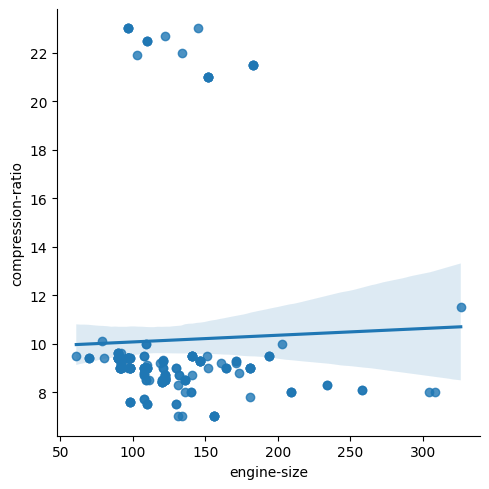

In [150]:
sns.lmplot(data=df, x='engine-size',y='compression-ratio')

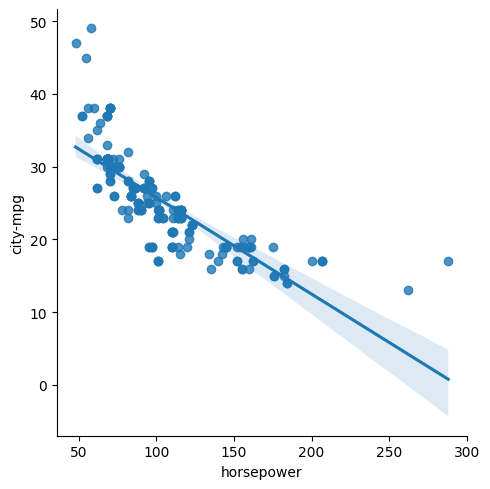

In [151]:
sns.lmplot(data=df, x='horsepower',y='city-mpg')

<AxesSubplot:xlabel='price', ylabel='Count'>

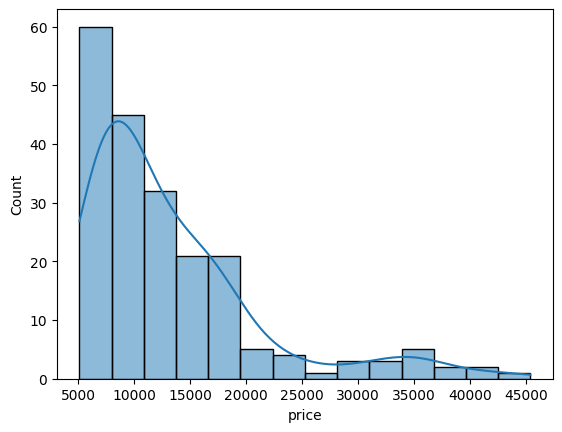

In [152]:
#count=df['price'].value_counts()
sns.histplot(df['price'],kde=True)

- ## Heat Map

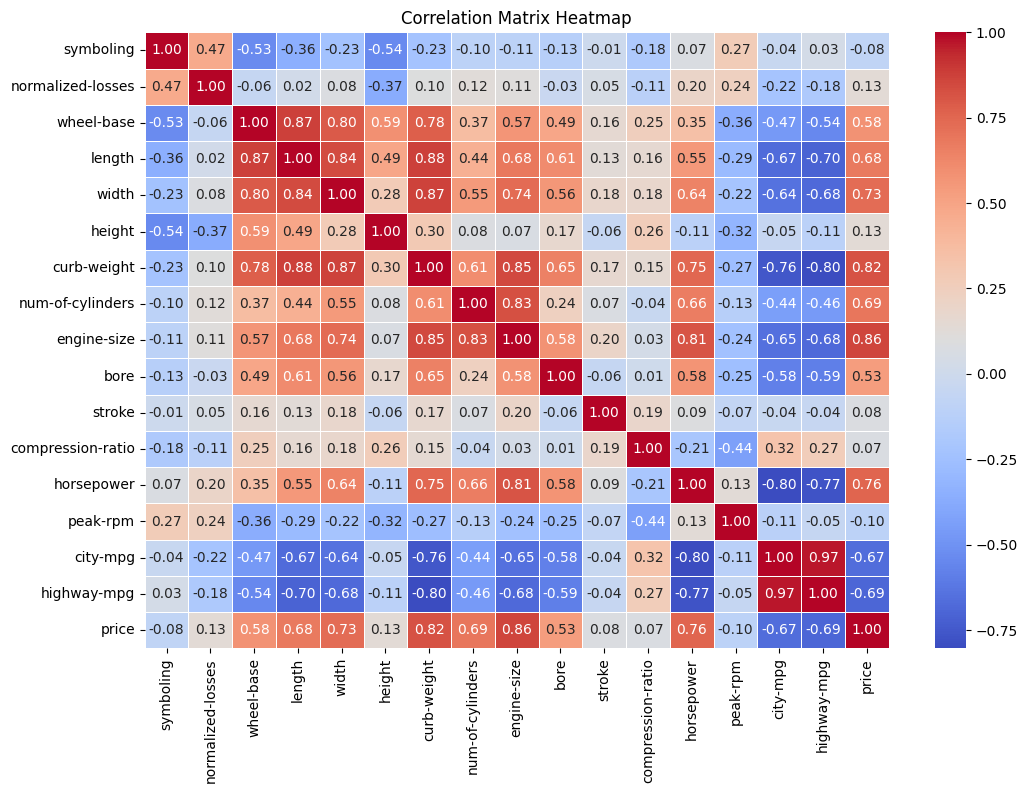

In [153]:
#Visualize the Correlation Matrix Using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [154]:
# corr_matrix =df[['horsepower', 'price', 'engine-size', 'bore']].corr()
# sns.heatmap(corr_matrix, cmap='Blues', linecolor='black', linewidths=1)



- ## Violin plot


<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

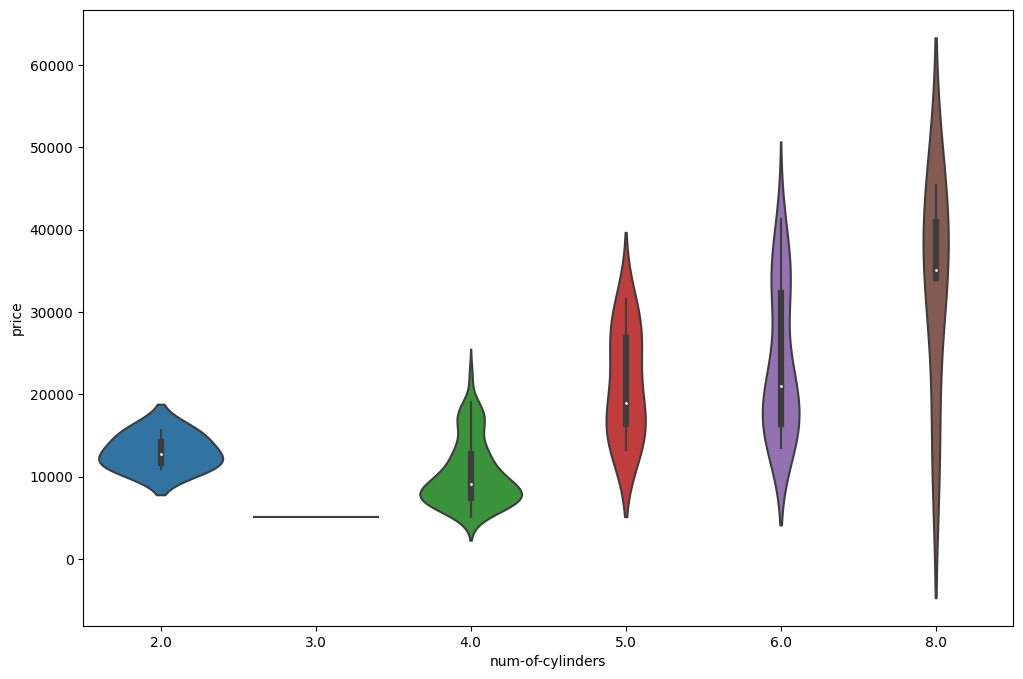

In [155]:
plt.figure(figsize=(12,8))
sns.violinplot(x='num-of-cylinders', y= 'price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

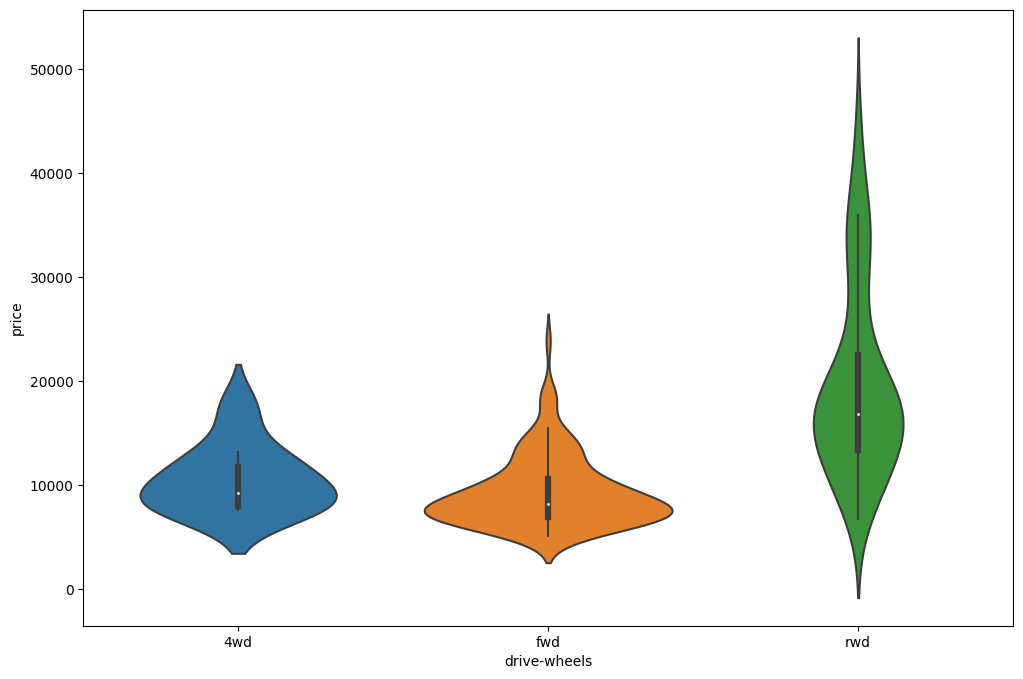

In [156]:
plt.figure(figsize=(12,8))
sns.violinplot(x='drive-wheels', y= 'price', data=df)

- ## Pairplot 

In [157]:
df.nunique()
#unique values per column

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       6
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
log_price            187
price_scaled         187
dtype: int64

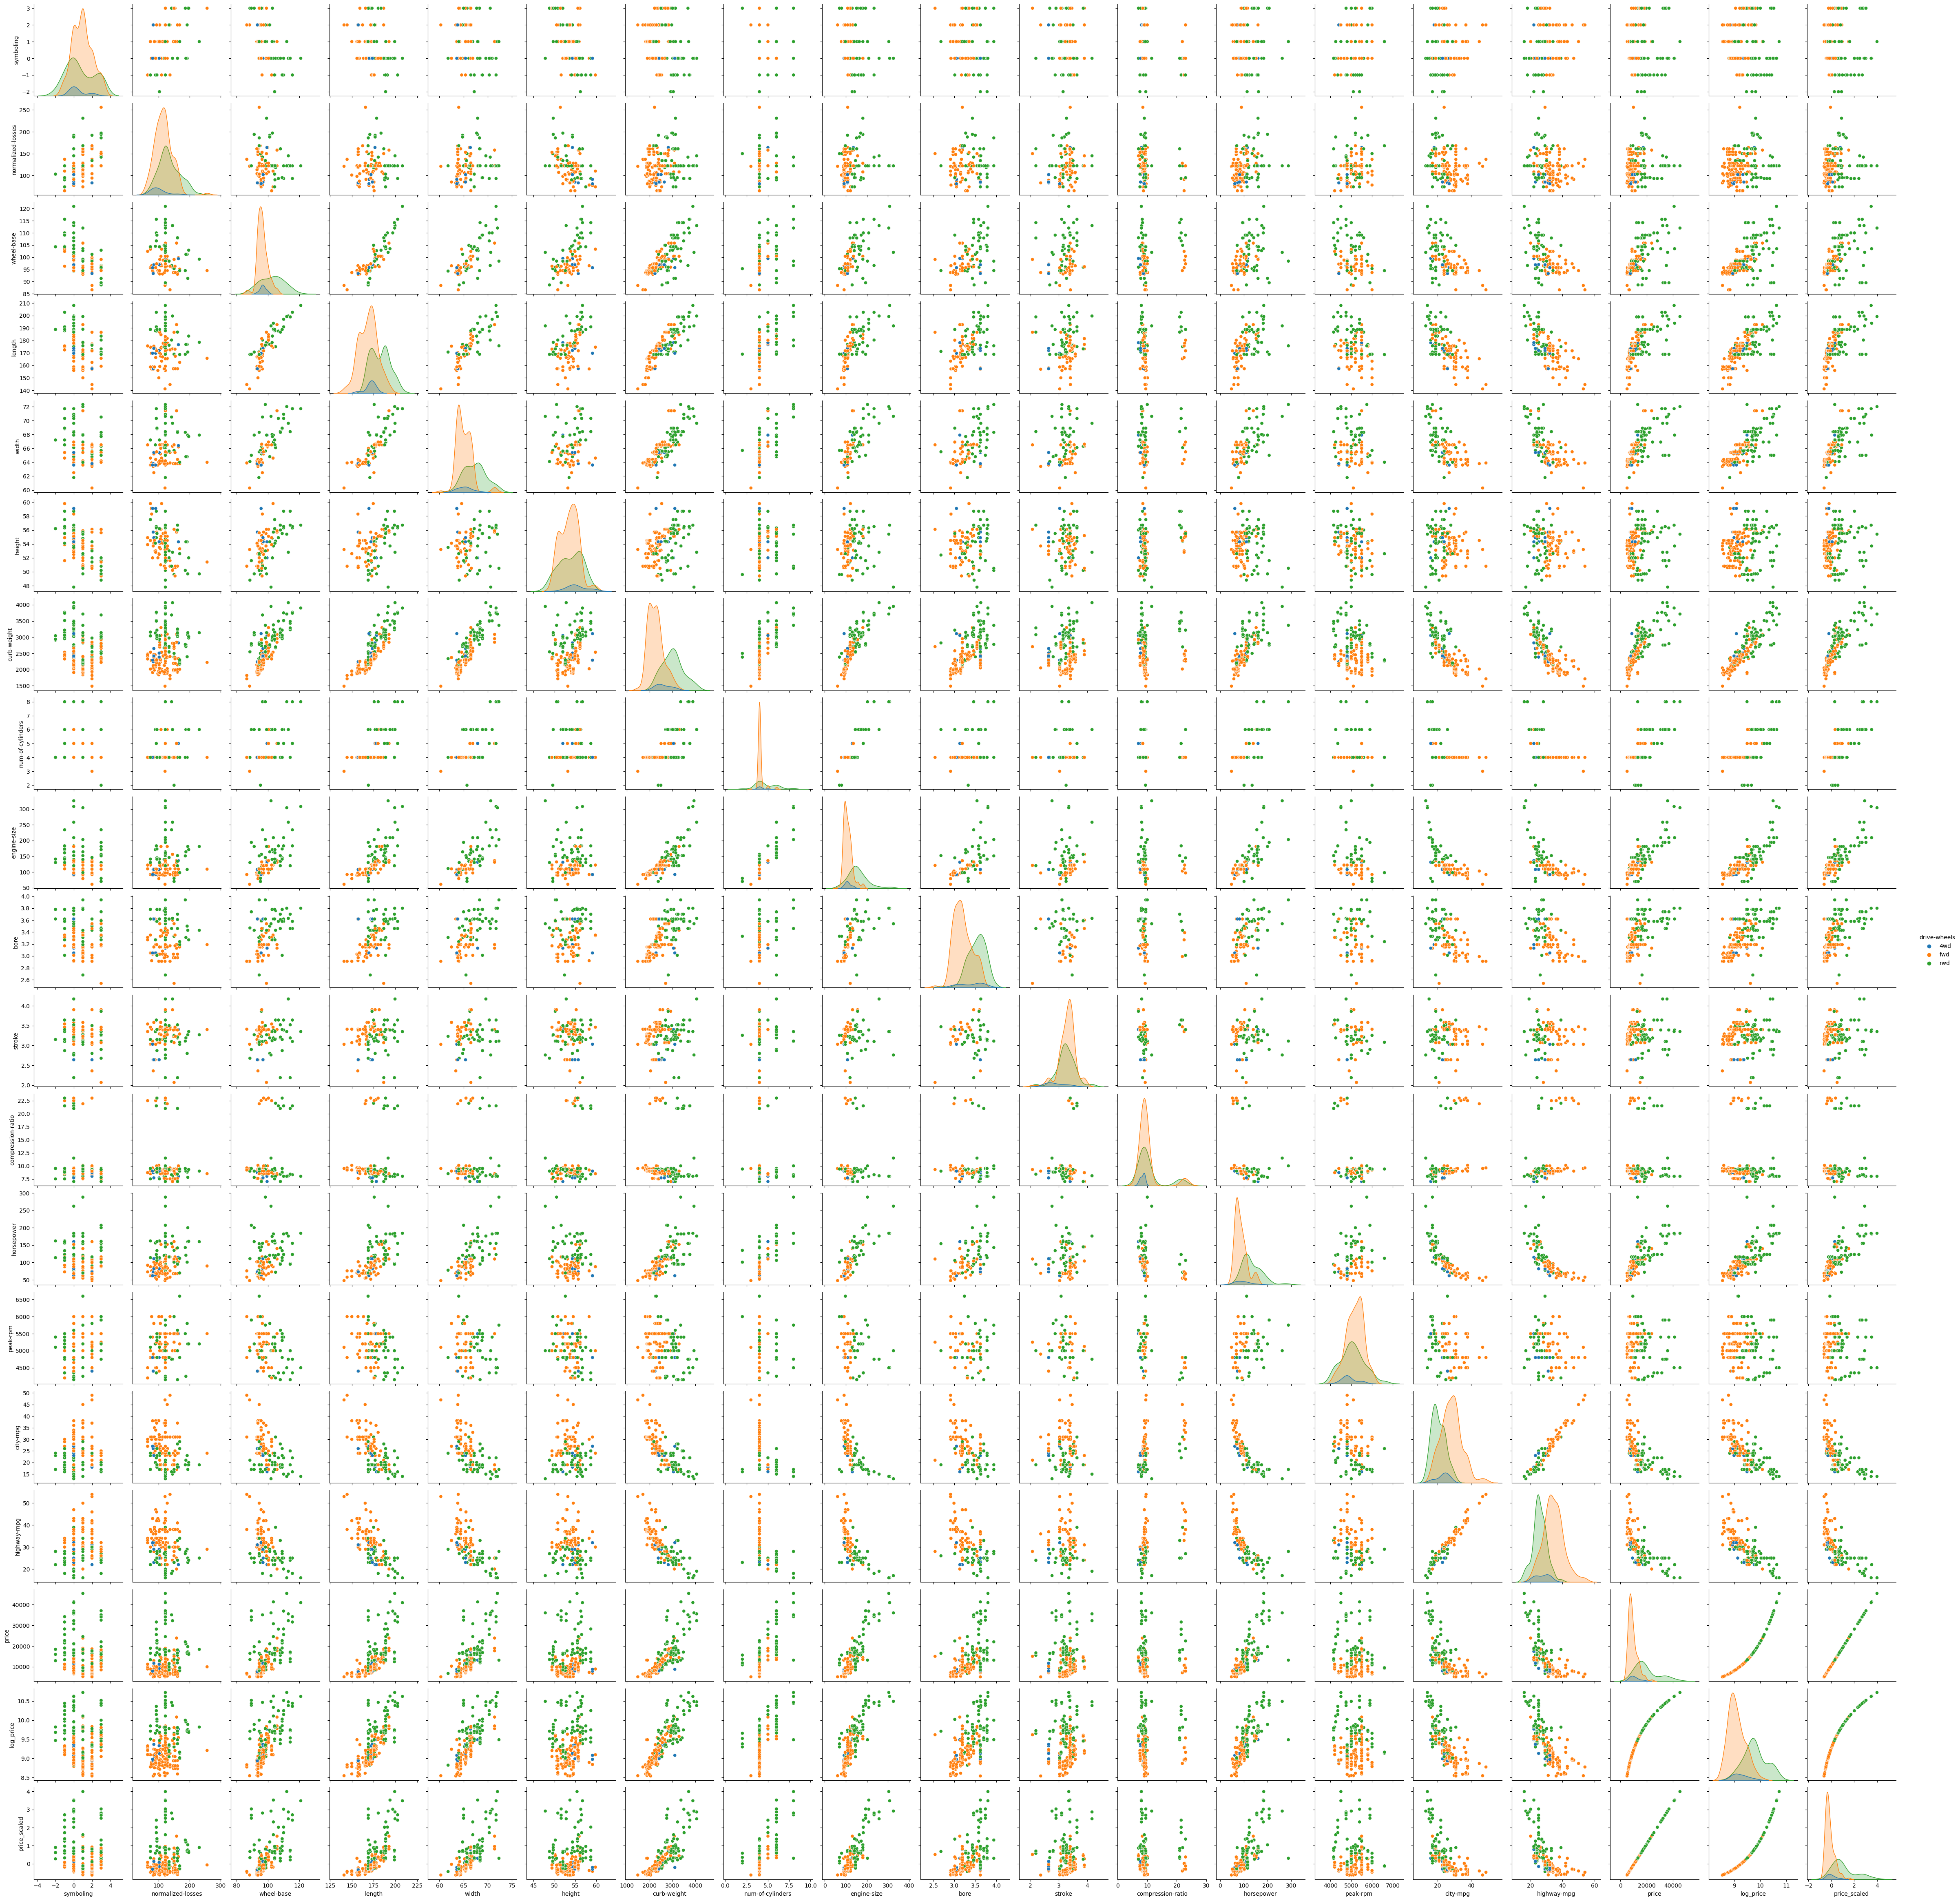

In [164]:
sns.pairplot(data=df,hue='drive-wheels')

- ## Countplot

<AxesSubplot:xlabel='aspiration', ylabel='count'>

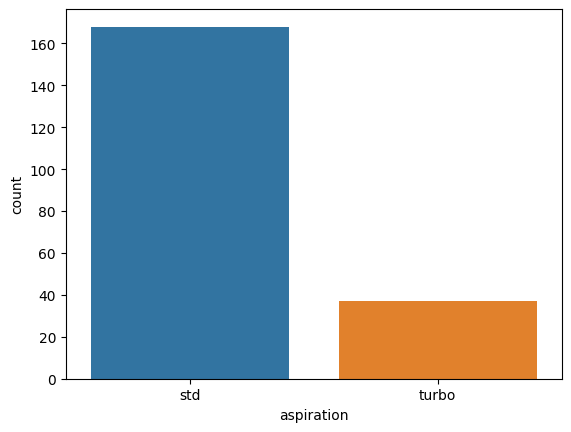

In [163]:
sns.countplot(data = df, x='aspiration')
# df.info()

- ## Catplot

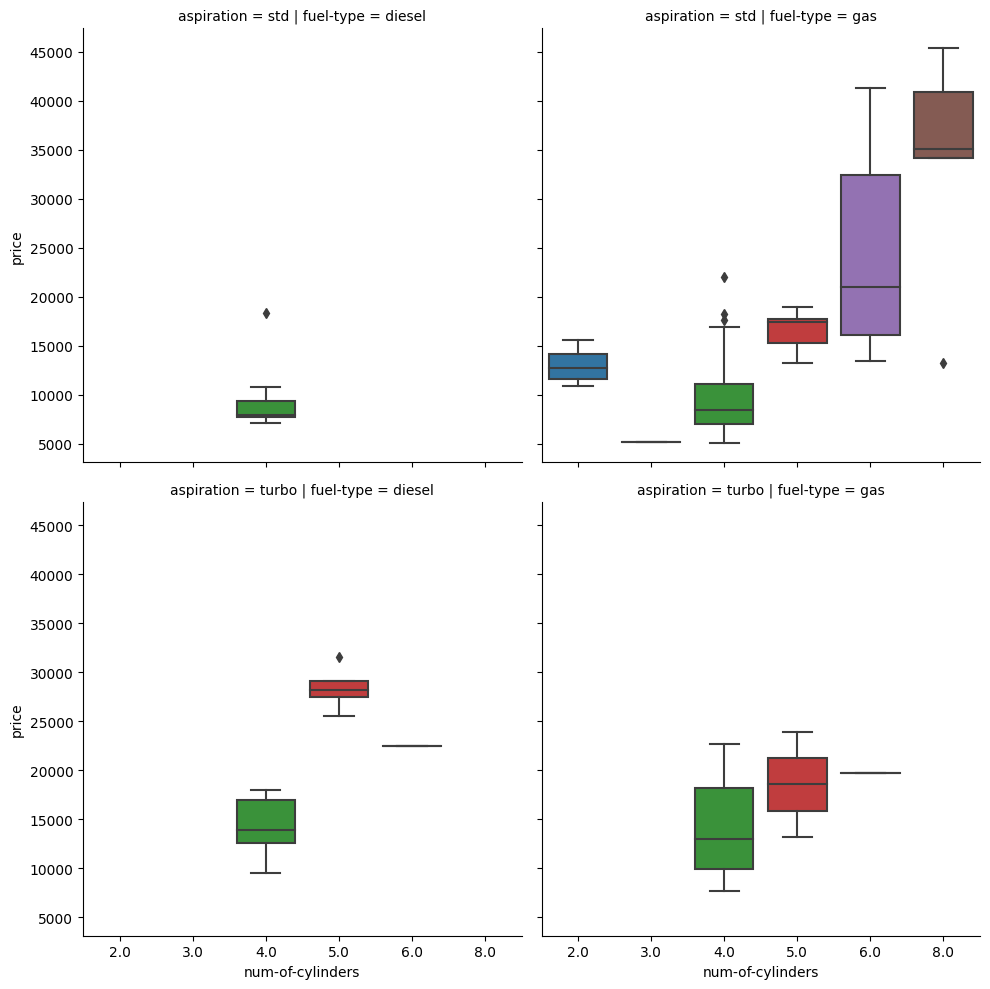

In [160]:
sns.catplot(x='num-of-cylinders', y= 'price', kind= 'box',col='fuel-type', row='aspiration', data=df)
# col- create different columns for categories in specified column
# col_wrap	Limits the number of columns (good for long categories)	col="sex", col_wrap=2
# aspect	Adjusts subplot width-to-height ratio	aspect=1.2
# height	Controls height of each subplot	height=4


- ## Pointplot

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

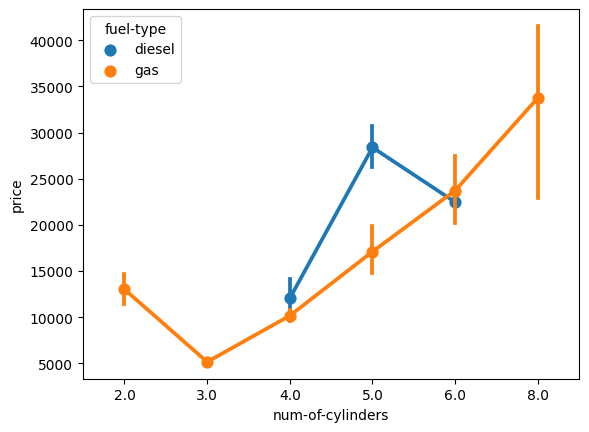

In [161]:
sns.pointplot(x='num-of-cylinders', y= 'price', hue='fuel-type', data =df)